## 1) Business case:
The data we have contains information about the fare of journey,type of Airline, Date_of_Journey, source and destination. Using these features in the given dataset we will try to create a model which tries predict the fare of flight. We will apply various  algorithms for the given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_excel('Flight_Fare.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Feature analysis:
1. Airline- Name of the airline

2. Date_of_journey- Date of departure of the flight

3. Source- Place of departure of flight

4. Destination- Place where the flight lands

5. Route- Fixed route of journey

6. Dep_Time- Time of departure of flight from source

7. Arrival_Time-Time of arrival of flight at destination

8. Duration- Total Time of journey

9. Total_Stops- Number of stops during the journey

10. Additional_info - Includes details about in flight meal and  check-in baggage

* **Target variable** - Price ,  to calculate the final price of flight.

In [3]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
# Checking all the unique values in the data set.
x= ['Airline',  'Source', 'Destination',
       'Arrival_Time', 'Total_Stops',
       'Additional_Info']
for i in x:
    print(i,df[i].unique())
    print('-------------------------------')
    


Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
-------------------------------
Arrival_Time ['01:10 22 Mar' '13:15' '04:25 10 Jun' ... '06:50 10 Mar' '00:05 19 Mar'
 '21:20 13 Mar']
-------------------------------
Total_Stops ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
-------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
-------------------------------


In [10]:
#Since there are two similar unique values , we replaced No Info to No info,
df.Additional_Info.replace('No Info', 'No info', inplace=True)

In [11]:
x= ['Airline',  'Source', 'Destination',
       'Arrival_Time', 'Total_Stops',
       'Additional_Info']
for i in x:
    print(i,df[i].unique())
    print('-------------------------------')
    


Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
-------------------------------
Arrival_Time ['01:10 22 Mar' '13:15' '04:25 10 Jun' ... '06:50 10 Mar' '00:05 19 Mar'
 '21:20 13 Mar']
-------------------------------
Total_Stops ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
-------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' '1 Long layover' 'Change airports' 'Business class'
 'Red-eye flight' '2 Long layover']
-------------------------------


In [12]:
df.dropna(inplace = True) #drop null values 

In [13]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [14]:
#removing duplicate rows
df.drop_duplicates(keep='first', inplace=True) 

# EDA:- Exploratory Data Analysis

* Univariant Analysis
* Bivariate Analysis

In [15]:
!pip install sweetviz
import sweetviz as sv
uni_analysis= sv.analyze(df)
uni_analysis.show_html()


                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


*Insights from univariant analysis:

* From the graph we can observe that Jet airways is most popular when compared to other airlines whereas only 10% of them are multiple carriers premium economy.


* More than 80% people preferred travelling in arlines other than pre defined dates.


* Around 42% of people preferred their source of journey from Delhi to other destinations, 27% from kolkata, mumbai and chennai were the least preferred at 7% and 4%



* 42% of people landed in Cochin , 27% landed in Bangalore whereas very few people landed in both hyderabad and kolkata 


* 53% of planes had only one stop, 33% were non- stop airlines whereas very few planes(less than 1 %) had more than 3 stops.


* 78% of them were having no info , 19% had no in flight meal included, 3% had no check in baggage included, rest of them were having less than 1% of info.

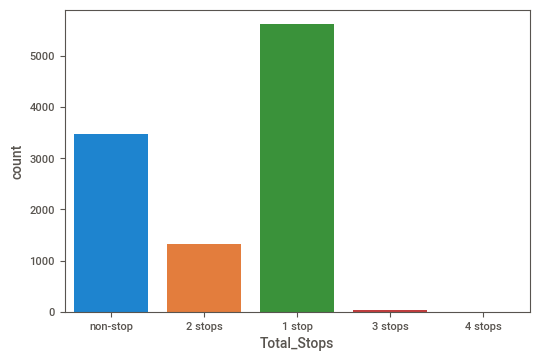

In [16]:
# Plotting count plot to visualize the count of Total_Stops.
sns.countplot(x='Total_Stops',data=df)
sns.set_theme(style="darkgrid")
plt.show()

#### Bivariant analysis- Analysis of 2 variables

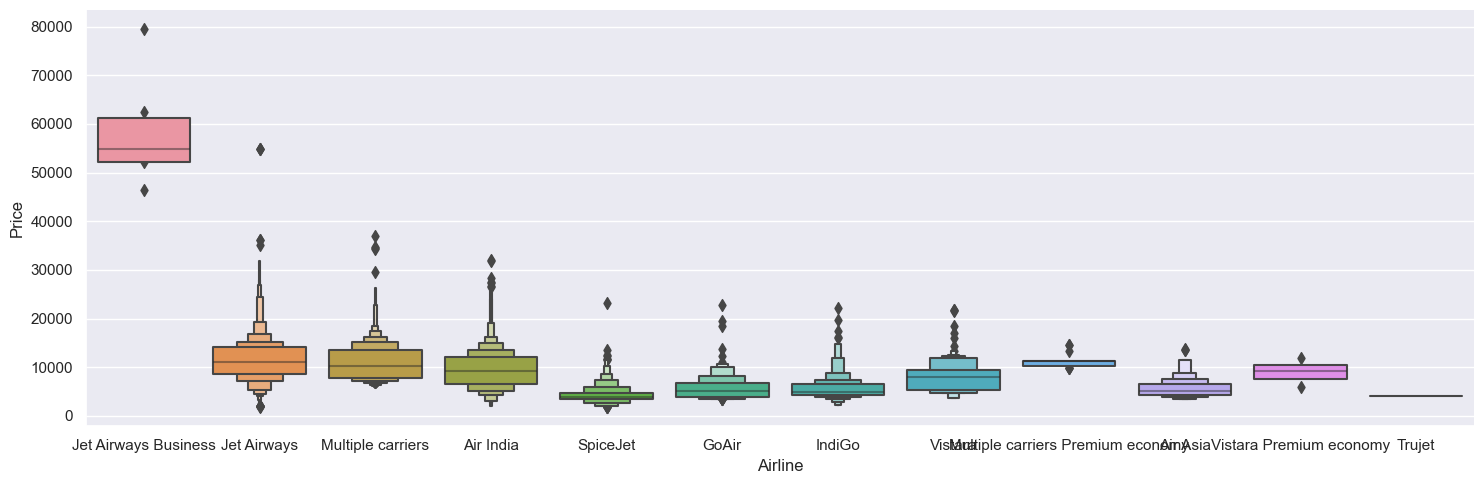

In [17]:
#Airline & price
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),height=5,aspect=3,
            kind="boxen")
plt.show()

**Observations:**
* Here with the help of the cat plot we are trying to plot the point box between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

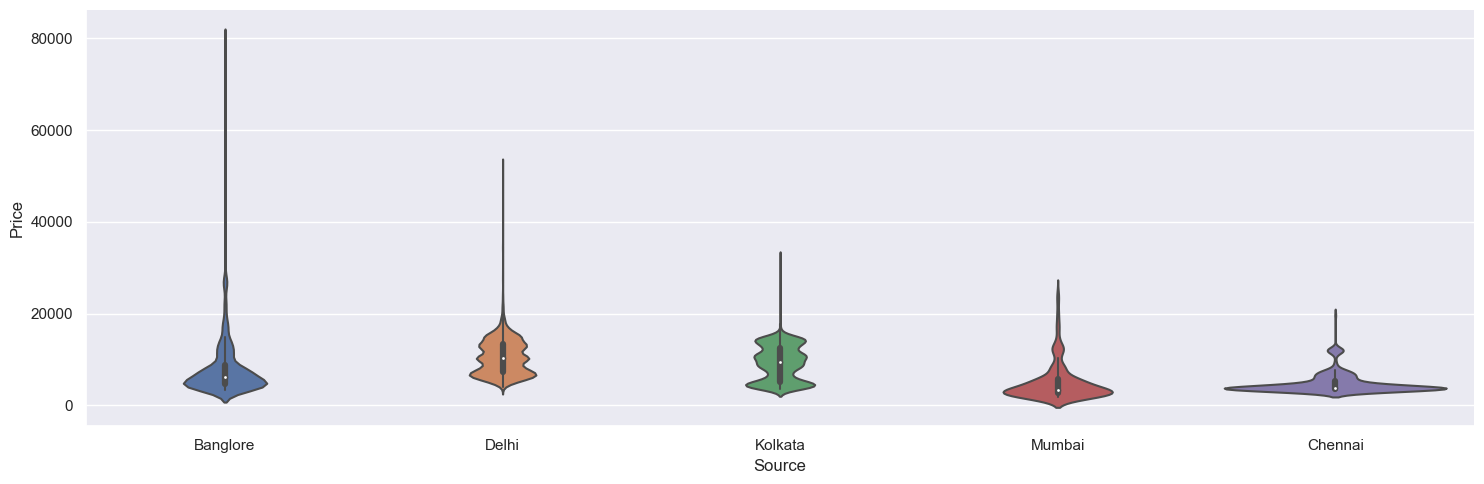

In [18]:
#Source & Price
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),
            kind='violin',height=5,aspect=3)
plt.show()

**Observation:**
* Now with the help of cat plot only we are plotting a violin plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

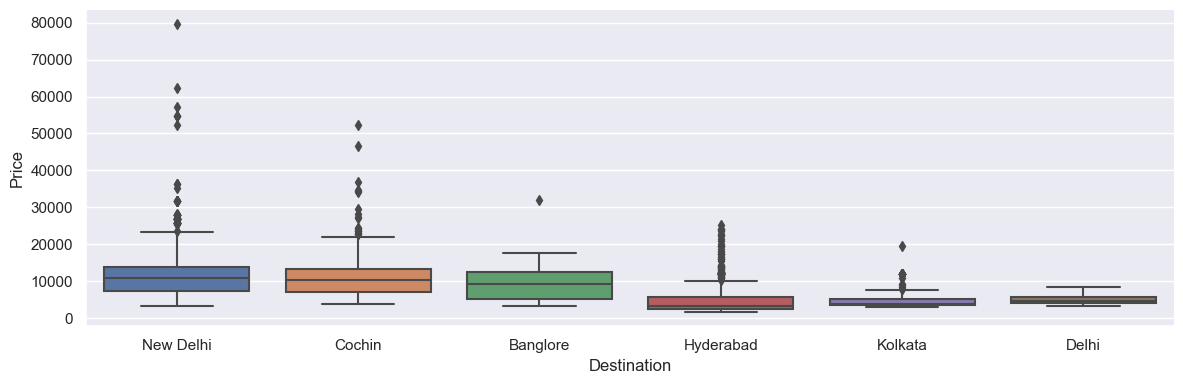

In [19]:
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),
            height=4,aspect=3,kind="box")
plt.show()

**Observation:**
* New Delhi has highest ticket price(12000)
* Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.

#### Splitting Date_of_Journey

In [20]:
#From description we can see that Date_of_Journey is a 
#object data type which Machine won't understand,
#Therefore, we have to convert this datatype into timestamp so as to use this 
#column properly for prediction
#For this we require pandas to_datetime to convert object data type to datetime dtype.
#**.dt.day method will extract only day of that date**\ **.dt.month method will extract
#only month of that date**

df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

# Since we have converted Date_of_Journey column into integers.drop Date_of_Journey
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [22]:
# Similar to Date_of_Journey we can extract values from Dep_Time
#Extracting hours
df['Hours'] = pd.to_datetime(df.Dep_Time).dt.hour
#Extraxting min
df['Min'] = pd.to_datetime(df.Dep_Time).dt.minute
#drop Dep_Time 
df.drop(['Dep_Time'],axis=1,inplace=True)

In [23]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Hours,Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [24]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df['Arr_Hours'] = pd.to_datetime(df.Arrival_Time).dt.hour
#Extracting Minute
df['Arr_min'] = pd.to_datetime(df.Arrival_Time).dt.minute
##drop Arrival_Time
df.drop(['Arrival_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Hours,Min,Arr_Hours,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    # Extracts only minutes from duration 

In [26]:
# Creating new columns for duration hours and duration minutes
df['Duration_hrs'] = duration_hours
df['Duration_mins'] = duration_mins
#now lets drop the Duration Column
df.drop(['Duration'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Hours,Min,Arr_Hours,Arr_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data
##### One can find many ways to handle categorical data. Some of them categorical data are,

* Nominal data -->data are not in any order - OneHotEncoder is used in this case.

* Ordinal data --> data are in order --->LabelEncoder is used in this case.

##### Airline

In [27]:
df.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

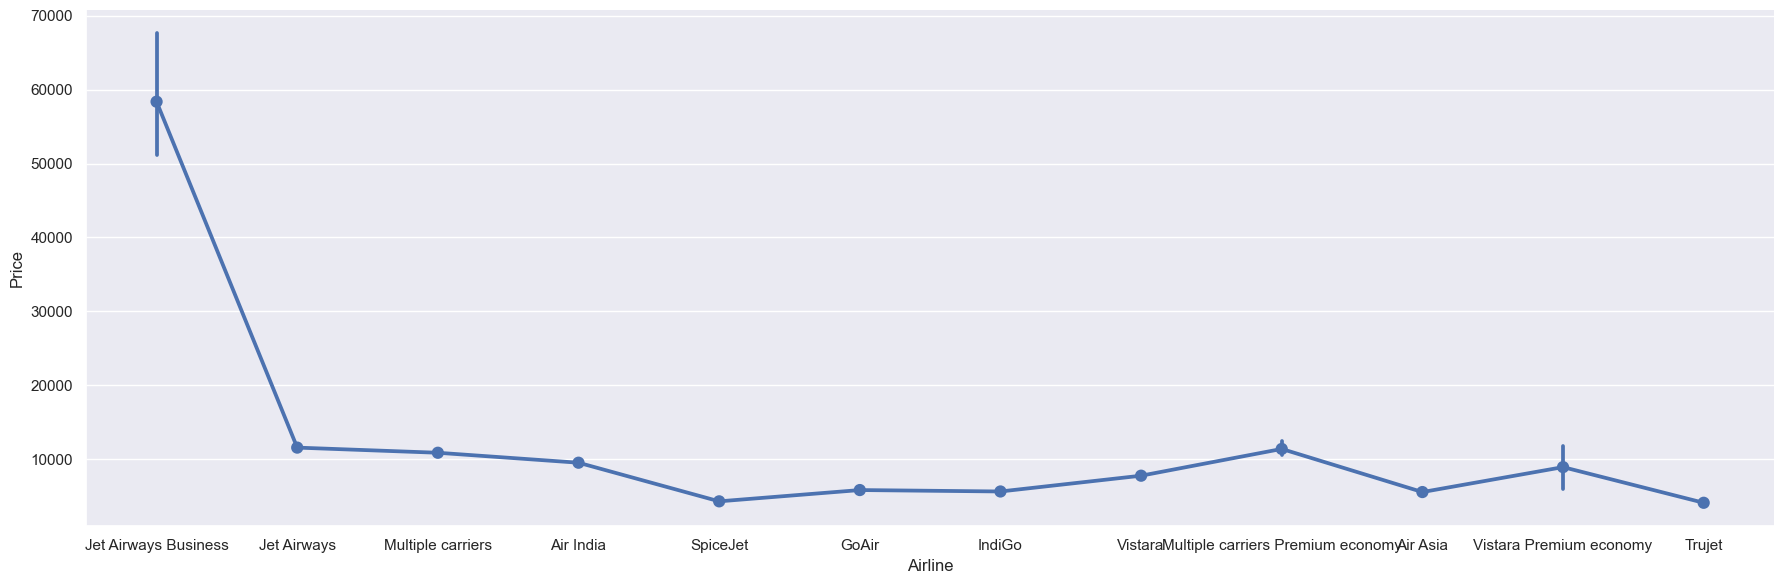

In [28]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price

sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),
            height=6,aspect=3,kind="point")
plt.show()

In [29]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


##### Source

In [30]:
# As source is Nominal Categorical data we will perform OneHotEncoding
df.Source.value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

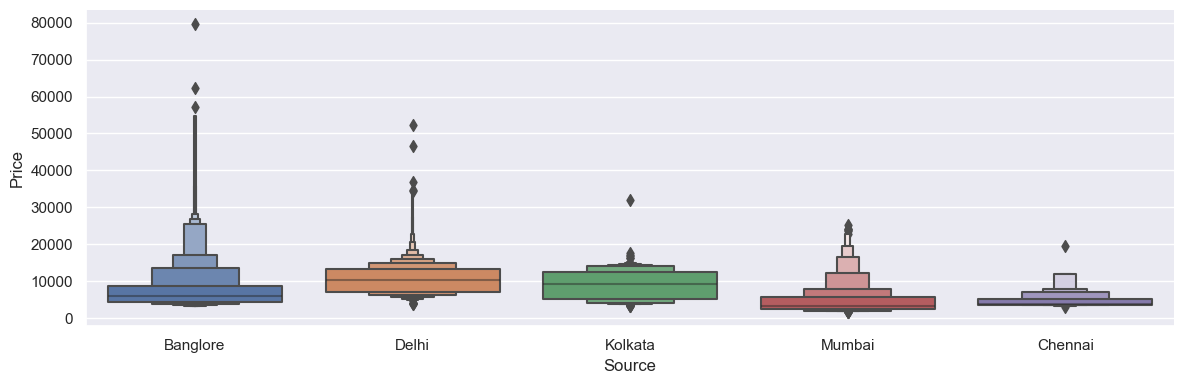

In [31]:
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=3)
plt.show()

In [32]:
Source =df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


##### Destination
* As Destinatin is Nominal Categorical data we will perform OneHotEncoding

In [33]:
df.Destination.value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

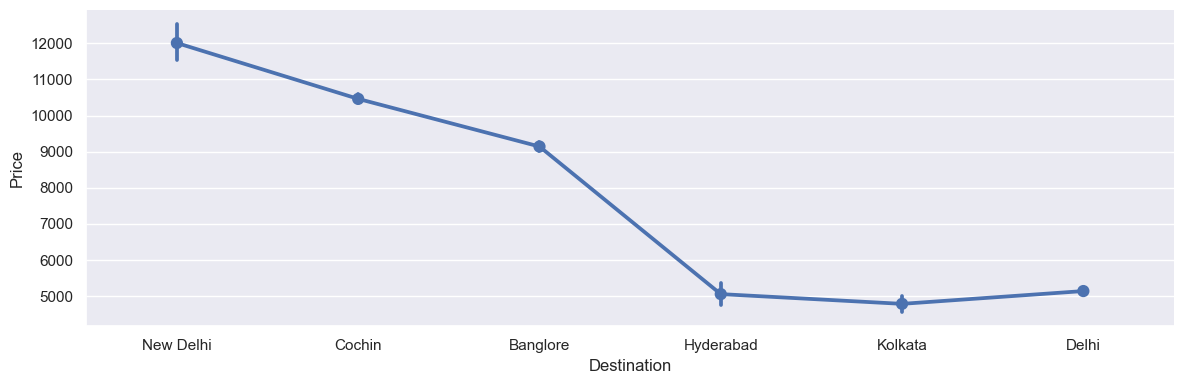

In [34]:
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),
            height=4,aspect=3,kind='point')
plt.show()

In [35]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
# Additional_Info contains almost 80% No_Info
# Route and Total_Stops are related to each other
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [37]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Hours,Min,Arr_Hours,Arr_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


##### Totsl_Stops

In [38]:
# Total Stops
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

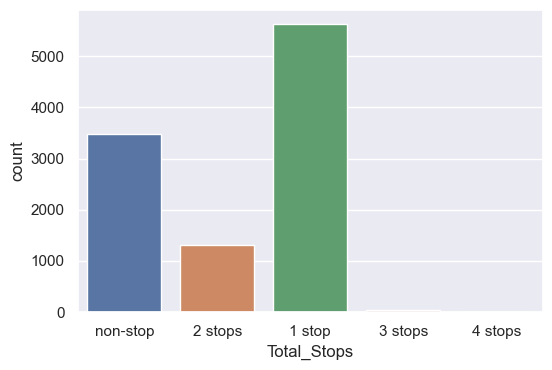

In [39]:
sns.countplot(x='Total_Stops',data=df)
plt.show()
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys)

In [40]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Hours,Min,Arr_Hours,Arr_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


#####  Concatenating the Encoded Columns

In [42]:
df1 = pd.concat([df,Airline,Source,Destination],axis=1)
df1

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Hours,Min,Arr_Hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,...,0,0,0,0,0,0,0,0,0,1


In [43]:
#Converting float to int 
df1['Total_Stops'] = df1.Total_Stops
df1['Total_Stops'] = pd.to_numeric(df1.Total_Stops,downcast='integer')

In [44]:
df1.drop(["Airline", "Source", "Destination"],axis=1,inplace=True)
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Hours,Min,Arr_Hours,Arr_min,Duration_hrs,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection
* Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

In [45]:
df1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Hours', 'Min',
       'Arr_Hours', 'Arr_min', 'Duration_hrs', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [46]:
#Buliding a model
X = df1[['Total_Stops', 'Journey_day', 'Journey_month', 'Hours', 'Min',
       'Arr_Hours', 'Arr_min', 'Duration_hrs', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Hours,Min,Arr_Hours,Arr_min,Duration_hrs,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y = df.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

<AxesSubplot:>

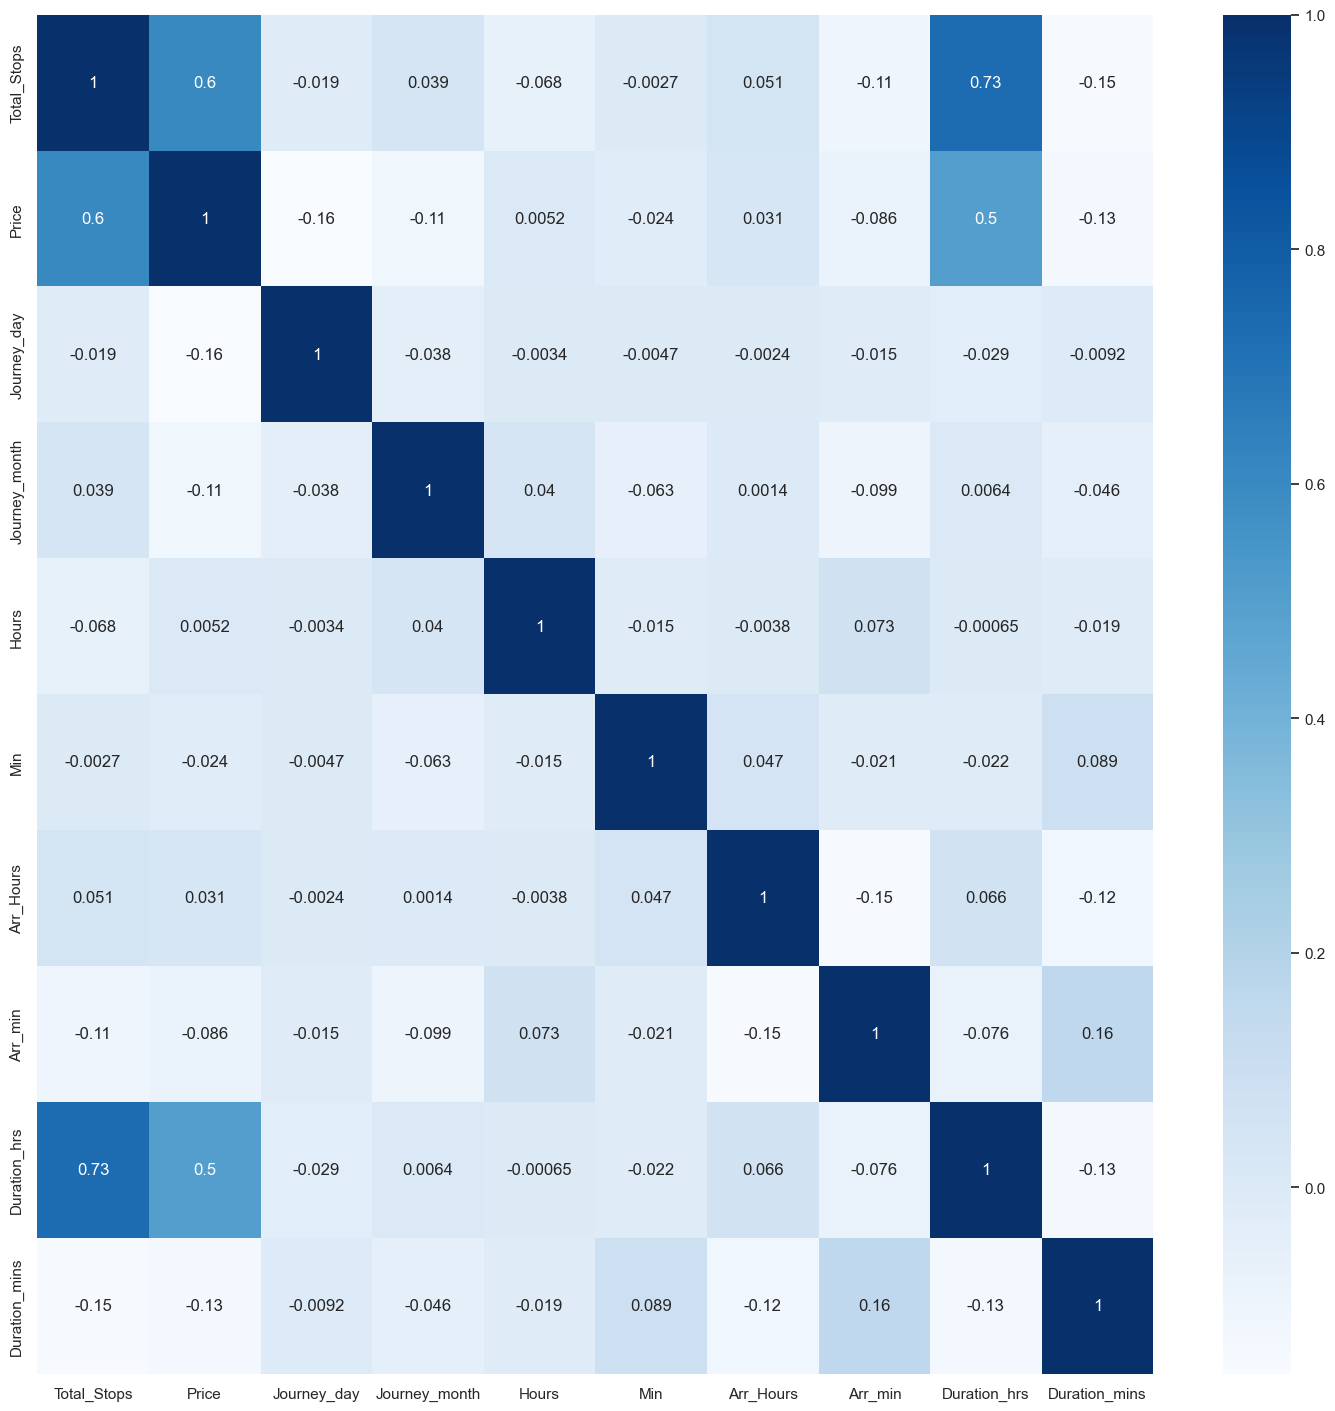

In [48]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

* From the above heatmap,we can observe that none of the features are highly correlated to each other.
* hence, we are not dropping any columns.

In [49]:
# Here we are applying ExtraTreeRegressor to check feature importance that affects the output.
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X,y)

ExtraTreesRegressor()

In [50]:
print(ETR.feature_importances_)

[2.40470452e-01 1.43070792e-01 5.43393550e-02 2.49084070e-02
 2.13637230e-02 2.73156853e-02 1.92826412e-02 9.43562012e-02
 1.79208038e-02 1.21095268e-02 1.67360491e-03 1.24682797e-02
 1.42605686e-01 6.91927163e-02 2.13086703e-02 9.43582824e-04
 2.81841353e-03 1.14139945e-04 5.10558213e-03 7.19624652e-05
 6.01275708e-04 1.33124117e-02 3.38339546e-03 7.18341440e-03
 1.63240861e-02 1.47367892e-02 7.25377398e-03 4.79778563e-04
 2.52848494e-02]


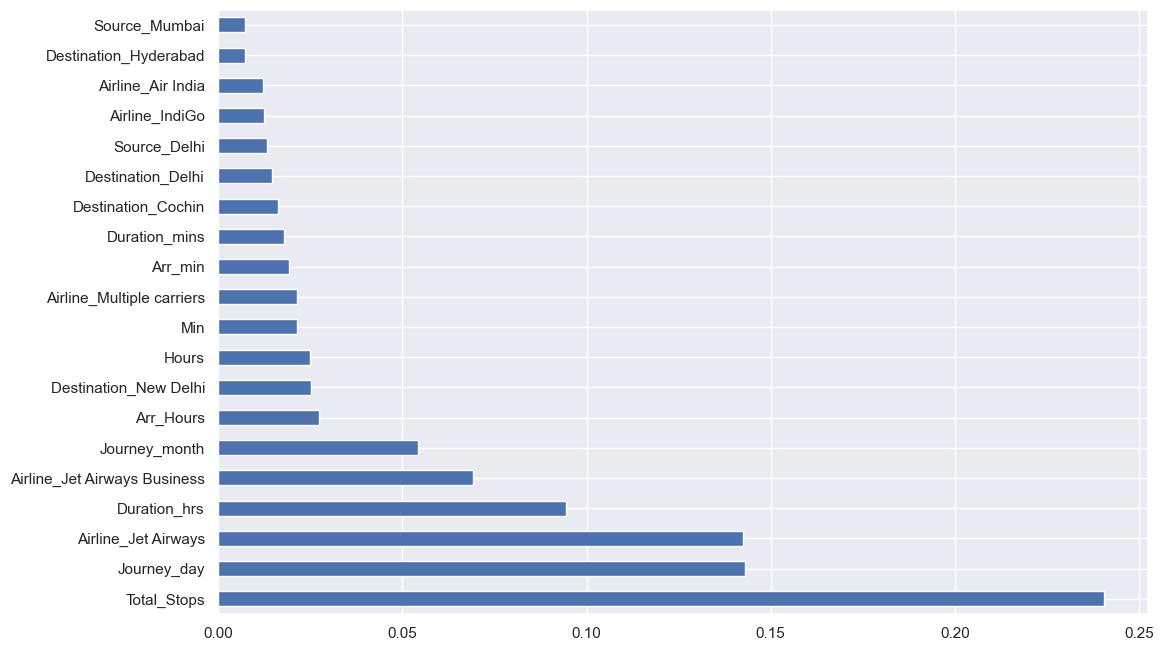

In [51]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(ETR.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [52]:
# From the above plot we can see that Total_stops,Journey_day,Airline_Jet_Airways,Duration_hrs,Airline_Jet_Airways Business,
# Journey_month has more impact on the ouput ie, Price.

In [53]:
# splitting the datasets to both train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
#Ensemble Technique
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
RFR_pred = RFR.predict(X_test)

In [56]:
# Now lets check the score of training phase
RFR.score(X_train,y_train)

0.9538534070160299

In [57]:
# Now lets check the score of test phase
RFR.score(X_test,y_test)

0.8098448748913848

C:\Users\sathyanarayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


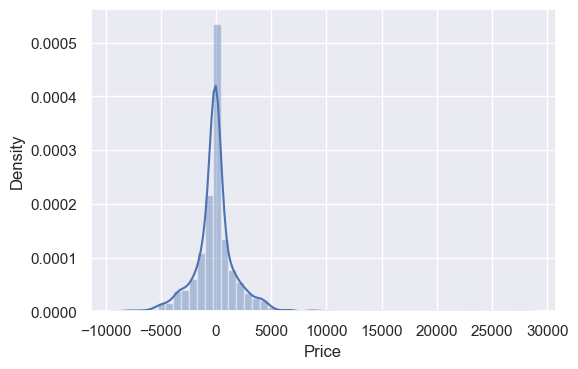

In [58]:
sns.distplot(y_test-RFR_pred)
plt.show()

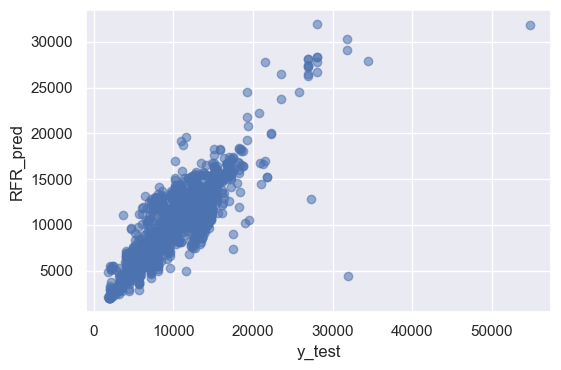

In [59]:
plt.scatter(y_test, RFR_pred, alpha = 0.55)
plt.xlabel("y_test")
plt.ylabel("RFR_pred")
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE:',mean_absolute_error(y_test, RFR_pred))
print('MSE:', mean_squared_error(y_test, RFR_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, RFR_pred)))
print('R2 Score:',r2_score(y_test,RFR_pred))

MAE: 1187.8358074236908
MSE: 3964786.9131902875
RMSE: 1991.1772681482398
R2 Score: 0.8098448748913848


# Hyperparameter Tuning
### Choose following method for hyperparameter tuning
* RandomizedSearchCV --> Fast
* Assign hyperparameters in form of dictionary
* Fit the model
* Check best paramters and best score

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [63]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [65]:
# Fitting the model with train data.
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [67]:
rf_random_pred = rf_random.predict(X_test)

C:\Users\sathyanarayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


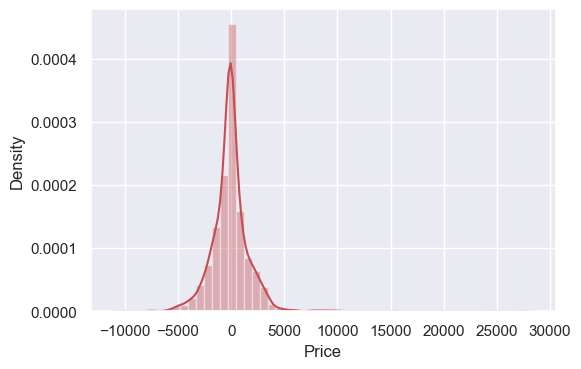

In [68]:
#The below represents the univariate distribution of data i.e. data distribution of a variable against 
#the density distribution
sns.distplot(y_test-rf_random_pred,color='r')
plt.show()

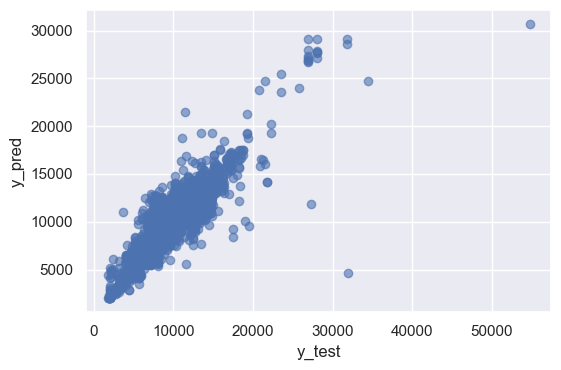

In [69]:
plt.scatter(y_test,rf_random_pred , alpha = 0.6)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
print('MAE:',mean_absolute_error(y_test,rf_random_pred))
print('MSE:', mean_squared_error(y_test, rf_random_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_random_pred)))

MAE: 1149.7292986413481
MSE: 3496142.334179876
RMSE: 1869.7974045815433


In [71]:
# We can observe that after using Grid Search Cv we obtained an accuracy of around 83%.
print('R2_score:',r2_score(y_test,rf_random_pred))

R2_score: 0.8323215351771432


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [73]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(40 *'.')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8369, 29)
The size of training output is (8369,)
........................................
The size of testing input is (2093, 29)
The size of testing output is (2093,)


##### K Neighbors Regressor

In [74]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_reg = GridSearchCV(KNeighborsRegressor(), params, cv =5, scoring = 'neg_mean_squared_error')
knn_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [75]:
y_train_pred =knn_reg.predict(X_train)
y_test_pred =knn_reg.predict(X_test) 

In [76]:
print('R2 Score:',r2_score(y_train.values, y_train_pred))

R2 Score: 0.7707199270116636


In [77]:
print('R2 Score:',r2_score(y_test, y_test_pred))

R2 Score: 0.542251198068794


###### Decision Tree Regressor

In [78]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [79]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [80]:
print('R2 Score for train data',r2_score(y_train.values, y_train_pred))
print('R2 Score for test data',r2_score(y_test, y_test_pred))

R2 Score for train data 0.916159234979727
R2 Score for test data 0.7847038939433397


# Comparison between Various Algorithms
####  Random Forest Regressor:-
                        * MAE: 1146.2863617416622
                        * MSE: 3489831.272107609
                        * RMSE: 1868.109009696064
                        * R2_score: 0.8321323320137319
####  K Neighbour Regressor:-
                        * R2 Score: 0.542251198068794
####  Decision Tree Regressor:-
                        * R2 Score: 0.7803529285497384
                        
* From the above algorithms applied , we can observe that the test data is performing well with Random Forest Regressor when compared to other two algortihms.

* Linear and logistic gives very less accuracy hence, we are not applying on our dataset.
 

In [82]:
!pip install cors

In [84]:
pip install -U flask-cors

In [86]:
# Dumping the pickle file
import pickle
# open a file, where you ant to store the data
file = open('Flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(RFR, file)